# MLT Lab FAT
## ANKITA SINHA 20MCI0003
### EXPERIMENT: Kmode, Bar chart
### DATASET: https://archive.ics.uci.edu/ml/datasets/Dresses_Attribute_Sales#


# K MODE 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import random 
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Attribute DataSet.xlsx", usecols=['Price', 'Size','Season','NeckLine'])
data.head(10)

,Price,Size,Season,NeckLine
0,Low,M,Summer,o-neck
1,Low,L,Summer,o-neck
2,High,L,Automn,o-neck
3,Average,L,Spring,o-neck
4,Low,M,Summer,o-neck
5,Low,M,Summer,v-neck
6,Average,XL,Summer,o-neck
7,Average,free,Automn,o-neck
8,Average,free,Spring,v-neck
9,Low,free,Summer,v-neck


In [3]:
data.shape

(500, 4)

In [4]:
labels = np.zeros(len(data.index))
print(len(labels))

500


In [5]:
data_array = data.to_numpy(dtype='str')

In [6]:
data_array[100]

array(['Average', 'free', 'Summer', 'open'], dtype='<U15')

In [7]:
print(len(data_array))
print(len(data_array[100]))

500
4


In [8]:
k = 10

initial_mode_index = np.random.randint(0, 500, size=1)
print(initial_mode_index)

Q = data_array[initial_mode_index]
print(Q)

[481]
[['Average' 'L' 'Spring' 'o-neck']]


In [9]:
def get_mode_object_comparision(mode, obj):
    return np.char.compare_chararrays(mode, obj, '!=', True)

mode_and_obj50 = get_mode_object_comparision(Q[0], data_array[50])
print(mode_and_obj50)

[ True  True  True  True]


In [10]:
distance = 0
for boolean in mode_and_obj50:
    if boolean == True:
        distance +=1
print(distance)

4


In [11]:
def calculate_distances(mode, objects):
    obj_num = len(data_array)
    
    distances = []

    for i in range(obj_num):
        dist_array = np.char.compare_chararrays(mode, objects[i], '!=', True)

        distance = 0

        for value in dist_array:
            if value == True:
                distance += 1

        distances.append(distance)

    return distances

In [12]:
distances = calculate_distances(Q[0], data_array)
print(distances)

[3, 2, 2, 0, 3, 4, 2, 2, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 3, 2, 1, 3, 4, 3, 3, 2, 1, 2, 3, 3, 1, 2, 1, 0, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 3, 4, 3, 0, 2, 1, 3, 3, 2, 4, 3, 3, 1, 2, 2, 3, 3, 4, 3, 2, 4, 3, 3, 3, 2, 3, 1, 3, 3, 1, 4, 4, 2, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 4, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 1, 2, 3, 2, 1, 2, 3, 2, 2, 1, 1, 0, 2, 4, 2, 2, 2, 2, 4, 0, 2, 3, 4, 3, 1, 4, 2, 2, 1, 1, 3, 2, 1, 3, 3, 4, 3, 1, 2, 1, 3, 4, 2, 2, 2, 3, 4, 4, 2, 3, 3, 2, 3, 3, 3, 1, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 3, 4, 2, 4, 2, 4, 4, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 2, 1, 3, 3, 2, 2, 4, 2, 1, 4, 3, 2, 1, 4, 1, 2, 3, 2, 4, 3, 3, 3, 4, 3, 3, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 2, 4, 3, 3, 3, 4, 2, 2, 4, 2, 2, 4, 3, 3, 3, 3, 4, 3, 4, 2, 3, 3, 2, 4, 4, 3, 2, 1, 3, 2, 2, 4, 2, 3, 4, 2, 2, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 1, 1, 3, 3, 3, 2, 4, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 4, 2, 3, 2, 3, 2, 1, 3, 

In [13]:
print(len(distances))

500


In [14]:
print(distances[222])

2


In [15]:
def update_labels():
    for i in range(len(distances)):
        if (distances[i] <= (len(Q[0]) / 2)):
            labels[i] = 1
        else:
            continue

update_labels()

print(labels)

[0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.

In [16]:
cluster_array = []
def select_cluster_objects():
    for i in range(len(labels)):
        if labels[i] == 1:
            cluster_array.append(data_array[i])
select_cluster_objects()
print(cluster_array)

[array(['Low', 'L', 'Summer', 'o-neck'], dtype='<U15'), array(['High', 'L', 'Automn', 'o-neck'], dtype='<U15'), array(['Average', 'L', 'Spring', 'o-neck'], dtype='<U15'), array(['Average', 'XL', 'Summer', 'o-neck'], dtype='<U15'), array(['Average', 'free', 'Automn', 'o-neck'], dtype='<U15'), array(['Average', 'free', 'Spring', 'v-neck'], dtype='<U15'), array(['Average', 'free', 'Summer', 'o-neck'], dtype='<U15'), array(['Average', 'free', 'Spring', 'v-neck'], dtype='<U15'), array(['Average', 'M', 'Summer', 'o-neck'], dtype='<U15'), array(['Average', 'L', 'spring', 'o-neck'], dtype='<U15'), array(['Average', 'M', 'Automn', 'o-neck'], dtype='<U15'), array(['Average', 'L', 'Automn', 'o-neck'], dtype='<U15'), array(['Average', 'M', 'Automn', 'o-neck'], dtype='<U15'), array(['Average', 'M', 'Spring', 'o-neck'], dtype='<U15'), array(['Low', 'L', 'Summer', 'o-neck'], dtype='<U15'), array(['Average', 'L', 'Automn', 'o-neck'], dtype='<U15'), array(['Low', 'M', 'Spring', 'o-neck'], dtype='<U15')

In [17]:
count = 0
for i in labels:
    if i == 1:
        count +=1
print('number of labels with value 1 in labels: ', count)
print('number of objects in cluster array: ', len(cluster_array))

number of labels with value 1 in labels:  234
number of objects in cluster array:  234


In [18]:
cluster_df = pd.DataFrame(cluster_array)

In [19]:
cluster_df.head()

,0,1,2,3
0,Low,L,Summer,o-neck
1,High,L,Automn,o-neck
2,Average,L,Spring,o-neck
3,Average,XL,Summer,o-neck
4,Average,free,Automn,o-neck


In [20]:
cluster_df.shape

(234, 4)

In [21]:
def column_frequencies(dataframe):
    frequencies = {}
    for column in dataframe:
        frequencies[column]= dataframe[column].value_counts()
    return frequencies

cluster1_frequencies = column_frequencies(cluster_df)
print(cluster1_frequencies[0])

Average      179
Low           29
low           11
Medium         7
High           4
very-high      3
high           1
Name: 0, dtype: int64


In [22]:
cluster1_frequencies

{0: Average      179
 Low           29
 low           11
 Medium         7
 High           4
 very-high      3
 high           1
 Name: 0, dtype: int64,
 1: L        82
 M        80
 free     55
 S         9
 XL        6
 s         1
 small     1
 Name: 1, dtype: int64,
 2: Spring    91
 Summer    56
 Winter    36
 Automn    28
 winter    16
 Autumn     4
 spring     2
 nan        1
 Name: 2, dtype: int64,
 3: o-neck            189
 v-neck             19
 boat-neck           7
 slash-neck          6
 Sweetheart          5
 turndowncollor      3
 bowneck             2
 sqare-collor        2
 open                1
 Name: 3, dtype: int64}

In [23]:
cluster_mode = cluster_df.mode()
cluster_mode

,0,1,2,3
0,Average,L,Spring,o-neck


In [24]:
new_mode = pd.DataFrame(cluster_mode)
new_mode

,0,1,2,3
0,Average,L,Spring,o-neck


In [25]:
new_mode_array = new_mode.to_numpy(dtype='str')
new_mode_array

array([['Average', 'L', 'Spring', 'o-neck']], dtype='<U7')

In [26]:
Qi = Q[0]
Qu = new_mode_array[0]

mode_difference = 0

mode_difference_array = get_mode_object_comparision(Qi, Qu)

for i in mode_difference_array:
    if i == True:
        mode_difference += 1
    else:
        continue

mode_difference

0

In [27]:
while mode_difference != 0:
    new_distances = calculate_distances(Qu, data_array)

    for i in range(len(new_distances)):
        if(distances[i] <= (len(Qu[0]) / 2)):
            labels[i] = 1
        else:
            continue

    new_cluster_array = []
        
    for i in range(len(labels)):
        if labels[i] == 1:
            new_cluster_array.append(data_array[i])

    new_cluster_df = pd.DataFrame(new_cluster_array)
    new_cluster_mode = pd.DataFrame(new_cluster_df.mode())
    new_cluster_mode_array = new_cluster_mode.to_numpy(dtype='str')

    Qi = Qu
    Qu = new_cluster_mode_array[0]

    mode_diff_array = get_mode_object_comparision(Qi, Qu)

    count = 0

    for i in mode_diff_array:
        if i == True:
            count += 1
        else:
            continue

    mode_difference = count
        
print('iteration complete')

iteration complete


In [28]:
mode_difference

0

In [29]:
Qi

array(['Average', 'L', 'Spring', 'o-neck'], dtype='<U15')

In [30]:
Qu

array(['Average', 'L', 'Spring', 'o-neck'], dtype='<U7')

In [31]:
mode_diff_array = get_mode_object_comparision(Qi, Qu)
mode_diff_array

array([False, False, False, False])

In [32]:
difference = 0
    
for i in mode_diff_array:
    if i == True:
        mode_difference += 1
    else:
        continue

difference

0

In [33]:
count = 0
for i in labels:
    if i == 1:
        count +=1
print('number of labels with value 1 in labels: ', count)
print('number of objects in cluster array: ', len(cluster_array))

number of labels with value 1 in labels:  234
number of objects in cluster array:  234


In [47]:
clustering_accuracy = (234 / 500)
clustering_accuracy

0.468

In [48]:
error = 1 - clustering_accuracy
error

0.532

# Bar Chart

In [36]:
import matplotlib.pyplot as plt

In [37]:
size = data['Size']
price = data['Price']
neckline = data['NeckLine']
season = data['Season']

In [38]:
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

<BarContainer object of 10 artists>

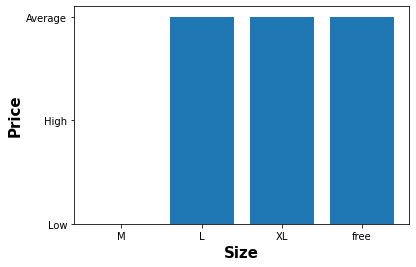

In [43]:
plt.xlabel('Size', fontweight ='bold', fontsize = 15)
plt.ylabel('Price', fontweight ='bold', fontsize = 15)


plt.bar(size[0:10], price[0:10])

<BarContainer object of 10 artists>

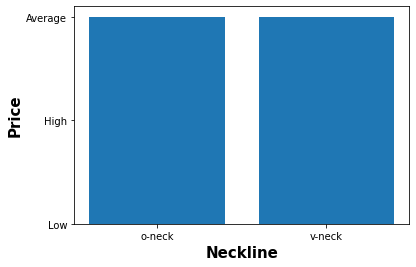

In [44]:
plt.xlabel('Neckline', fontweight ='bold', fontsize = 15)
plt.ylabel('Price', fontweight ='bold', fontsize = 15)

plt.bar(neckline[0:10], price[0:10])

<BarContainer object of 10 artists>

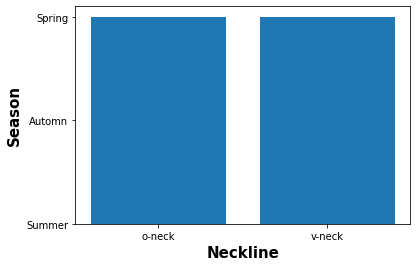

In [45]:
plt.xlabel('Neckline', fontweight ='bold', fontsize = 15)
plt.ylabel('Season', fontweight ='bold', fontsize = 15)


plt.bar(neckline[0:10], season[0:10])